In [1]:
from qutip import *
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import IntProgress
from IPython.display import display
from time import time

# Quantum Harmonic Oscillator 

Basic simulation of the quantum harmonic oscillator in which I will be plotting Wigner functions for eigenstates and coherent states. 

In [2]:
N = 10

a = destroy(N)
a_dag = create(N)

H = a_dag*a+0.5                                 #in units of h_bar*w 

eigenvalues, eigenfunc = H.eigenstates()

x = np.linspace(-10,10,1000)
p = np.linspace(-5,5,1000)
psi_2c = 0.5*(coherent(20,2.5) +coherent(20,-2.5)).unit()
wig = wigner(psi_2c,x,p)

#%matplotlib inline
#fig = plt.figure(figsize = (6,6)) 
#ax = fig.add_subplot(111)
#ax.set_aspect(1);
#plot_wigner(eigenfunc[0], fig = fig, ax = ax, projection = '2d');
#plt.savefig('Wigner_QHO_Ground_State')

## Plotting using plotly

In [ ]:
fig = px.imshow(wig, color_continuous_scale='RdBu', 
                color_continuous_midpoint = 0, title = 'Wigner Function', 
                x = x, y = x,
                labels=dict(x = r"$Re(\alpha)$", y= r"$Im(\alpha)$"))
fig.show()

#There seems to be no way to get LaTeX to work in the hover label... 

In [ ]:
fig = go.Figure(data=[go.Surface(z=wig, colorscale = 'rdbu', cmid = 0.0, cmax = 0.05, cmin = -0.05, x = x, y = p, hoverinfo=None, hoverlabel=None , opacity = 0.95)])


fig.update_layout(title='Wigner function', autosize=False,
                  width=1250, height=1500,
                  scene = dict(
                    xaxis = dict(visible = False, showgrid = True),
                    yaxis = dict(visible= False),
                    zaxis = dict(showbackground = True, showgrid= True,visible = False)
                 )
                 )



fig.show()

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, x)

wign = ax1.plot_surface(X = X, Y = Y, Z = wig, cmap = 'RdBu')
ax1.set_xlabel(r'$Re(\alpha)$')
ax1.set_ylabel(r'$Im(\alpha)$')
plt.show()

## Plot Eigenstates

In [ ]:
wig1 = wigner(eigenfunc[4],x,x) 

fig = px.imshow(wig1, color_continuous_scale='RdBu', 
                color_continuous_midpoint = 0, title = 'Wigner Function', 
                x = x, y = x,
                labels=dict(x = r"$Re(\alpha)$", y= r"$Im(\alpha)$"))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Surface(z=wig1, colorscale = 'rdbu', cmid = 0, x = x, y = x)])

fig.update_layout(title='Wigner function', autosize=False,
                  width=600, height=600,
                  scene = dict(
                    xaxis_title= r'$Re(\alpha)$',
                    yaxis_title= r'$Im(\alpha)$')
                 )

fig.show()

In [ ]:
#Now integrate wigner function over the momentum coordinate 
psi2 = np.sum(wig1, axis = 0)/(np.sum((x[1]-x[0])*np.sum(wig1, axis=0)))

%matplotlib inline
fig2 = plt.figure(figsize = (6,6)) 
ax2 = fig2.add_subplot(111)
#ax2.set_aspect(1);

ax2.plot(x, psi2)
ax2.set_ylabel(r'$|\Psi(x)|^2$')
ax2.set_xlabel('x')
ax2.set_ylim(0,1)
ax2.grid()

## Coherent state

0.31729276632071374


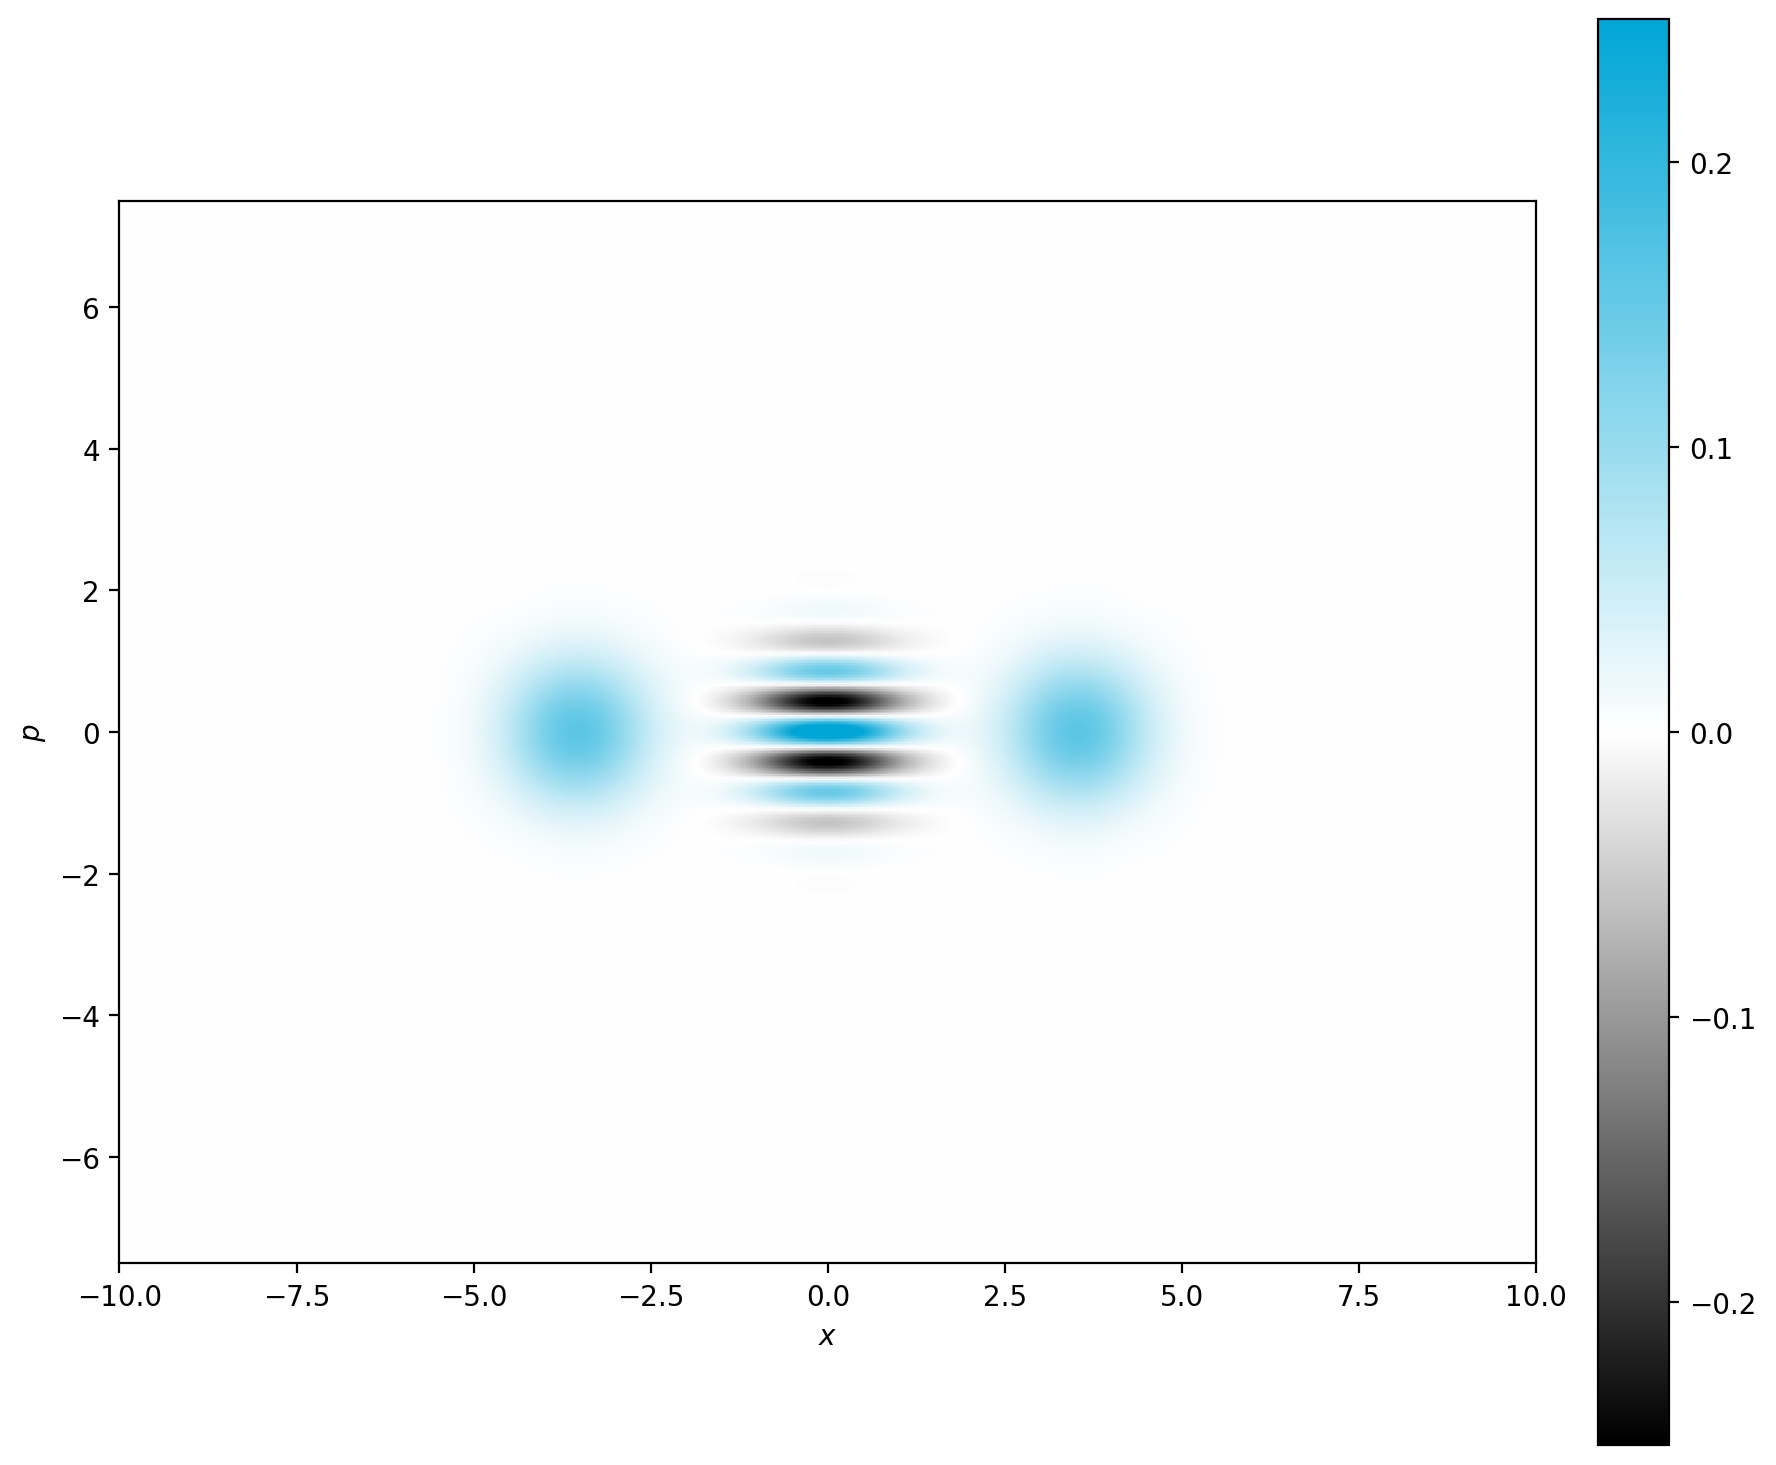

In [3]:
import matplotlib.colors as mc

N = 30
x = np.linspace(-10,10,700)
p = np.linspace(-7.5,7.5,700)


a = destroy(N)
a_dag = create(N)

H = a_dag*a+0.5    

psi0 = np.sqrt(0.5)*coherent(20,2)
psi1 = np.sqrt(0.5)*basis(20,0)
rho3 = np.sqrt(0.5)*(coherent(20,2)*coherent(20,2).dag()+coherent(20,-2)*coherent(20,-2).dag()).unit()
psi4 = coherent(20,2j)


psi_4c = (coherent(20,2.5) + coherent(20,-2.5)+coherent(20,-2.5j)+coherent(20,+2.5j)).unit()
psi_2c = (coherent(20,2.5) +coherent(20,-2.5)).unit()



wig_coherent = wigner(psi_2c,x,p)

#colors = [(0, 0, 0), (255, 255, 255), (0, 166, 214)]
colors = ['#000000' , '#FFFFFF',  '#00A6D6']

cmap_name = 'my_list'
cm = mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
extent = [x[0],x[-1],p[0],p[-1]]
plt.figure(figsize=(10,10), dpi =200)
plt.imshow(wig_coherent, cmap = cm, vmin = -0.25 , vmax = +0.25 , extent = extent, origin = 'lower');
#plt.imshow(wig_coherent, cmap = cm, vmin = -np.max(wigner(basis(20,0),x,x)) , vmax = +np.max(wigner(basis(20,0),x,x)) , extent = extent, origin = 'lower');
#plt.ylabel(r'$Im(\alpha)$')
#plt.xlabel(r'$Re(\alpha)$')
plt.ylabel(r'$p$')
plt.xlabel(r'$x$')
plt.colorbar(fraction=0.046, pad=0.04)
#title = plt.title("Wigner Functions")
#plt.savefig('Wigner_Cover_Test1.png')

print(np.max(wig_coherent))


#%matplotlib inline
#fig = plt.figure(figsize = (6,6)) 
#ax = fig.add_subplot(111)
#ax.set_aspect(1);
#plot_wigner(psi0, fig = fig, ax = ax, projection = '2d');

In [ ]:
t = np.linspace(0,2*np.pi*3,100)
result = sesolve(H, psi0, t)

In [ ]:
from matplotlib import animation

def make_wigners(x,t,result):  
    print("Making wigner functions")
    wigner_array = np.empty([len(t),len(x),len(x)])
    f = IntProgress(min=0, max=len(result.states)-1) # instantiate the bar
    display(f) # display the bar
    for i in range(0, len(t)):
        wig = wigner(result.states[i],x,x)
        wigner_array[i,:,:] = wig
        f.value=i
        
    return wigner_array

def make_animation(x, wigner):
    f = IntProgress(min=0, max=len(wigner)-1) # instantiate the bar
    
    extent = [x[0],x[-1],x[0],x[-1]]
    fig = plt.figure()
    plane = plt.imshow(wigner[0,:,:], cmap = 'RdBu', vmin = -np.max(wigner[0,:,:]), vmax = np.max(wigner[0,:,:]), extent = extent, origin = 'lower');
    plt.ylabel(r'$Im(\alpha)$')
    plt.xlabel(r'$Re(\alpha)$')
    plt.colorbar()
    title = plt.title("Wigner")
    plt.close(fig)
    
    def animate(i):
        if (i == 1):
            print("Generating animation")
            display(f) # display the bar
        wig_i = wigner[i,:,:]
        plane.set_data(wig_i)
        f.value = i
        return plane,
    
    anim = animation.FuncAnimation(fig, animate,frames=100, interval=40)
    
    return anim

In [ ]:
wigner_functions = make_wigners(x,t,result)
anim = make_animation(x, wigner_functions)

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
anim

In [ ]:
#Plot Wigner functions of first 5 eigenstates
x = np.linspace(-6,6,400)

wigner_functions = np.empty([5,len(x),len(x)])
for i in range(0,5):
    wig = wigner(np.flip(States_rot)[i],x,x)
    wigner_functions[i,:,:] = wig

wig = wigner()
    
def wigner_interact_plot(State = 0):
    extent = [x[0],x[-1],x[0],x[-1]]
    plt.figure(figsize=(6,6))
    plt.imshow(wigner_functions[State,:,:], cmap = 'RdBu', vmin = -np.max(wigner_functions[:,:,:]) , vmax = +np.max(wigner_functions[:,:,:]) , extent = extent, origin = 'lower');
    plt.ylabel(r'$Im(\alpha)$')
    plt.xlabel(r'$Re(\alpha)$')
    plt.colorbar()
    title = plt.title("Wigner Functions")
    #plt.savefig('Wigner_Kerr_par_eps=%.2fK_n=%.d.png'%(eps_p/K, State))

interact(wigner_interact_plot, State =(0,4));